In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics
import pandas as pd 
import math
import xgboost as xgb
import matplotlib.pyplot as plt

In [2]:
features_df = pd.read_csv("../data/feature_engineered_dataset.csv")
features_df.set_index(features_df['Date'],inplace=True)
features_df.drop(columns='Date',inplace=True)

In [3]:
y = features_df['crude_price']
X = features_df.drop(['crude_price'],axis=1)
X = X.dropna(how='any')
y = y.dropna(how='any')
X_train = X[:math.floor(len(X)*0.8)]
X_test = X[math.floor(len(X)*0.8):]
y_train = pd.DataFrame(y[:math.floor(len(X)*0.8)])
y_test = pd.DataFrame(y[math.floor(len(X)*0.8):])

In [4]:
# Creating all the models 
regression = LinearRegression()
tree = DecisionTreeRegressor(max_depth=10)
random_forest = RandomForestRegressor(max_depth=500)
sv_regressor = SVR(kernel='poly')
xgb_reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)

In [5]:
# Fitting all the models to the data 
regression.fit(X_train, y_train)
tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
sv_regressor.fit(X_train, y_train)
xgb_reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-rmse:69.84571	validation_1-rmse:66.77920
[100]	validation_0-rmse:26.83129	validation_1-rmse:37.13202
[200]	validation_0-rmse:11.62524	validation_1-rmse:25.43251
[300]	validation_0-rmse:6.74996	validation_1-rmse:22.19529


c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [09:48:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[400]	validation_0-rmse:5.27290	validation_1-rmse:21.31879
[500]	validation_0-rmse:4.67794	validation_1-rmse:21.15984
[600]	validation_0-rmse:4.36307	validation_1-rmse:20.87866
[700]	validation_0-rmse:4.14381	validation_1-rmse:20.66958
[800]	validation_0-rmse:3.97647	validation_1-rmse:20.47361
[900]	validation_0-rmse:3.78141	validation_1-rmse:20.35385
[905]	validation_0-rmse:3.77094	validation_1-rmse:20.36214


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [6]:
# Making predictions with each model
regression_pred = regression.predict(X_test)
tree_pred = tree.predict(X_test)
random_forest_pred = random_forest.predict(X_test)
sv_regressor_pred = sv_regressor.predict(X_test)
xgb_reg_pred = xgb_reg.predict(X_test)

In [7]:
# Converting the predictions to dataframes to more easily view them
regression_pred = pd.DataFrame(regression_pred)
tree_pred = pd.DataFrame(tree_pred) 
random_forest_pred = pd.DataFrame(random_forest_pred)
sv_regressor_pred = pd.DataFrame(sv_regressor_pred)
xgb_reg_pred = pd.DataFrame(xgb_reg_pred)

In [8]:
# Printing the RMSE values of the models 
print('Linear Regression RMSE: ',round(sklearn.metrics.root_mean_squared_error(y_test, regression_pred),3))
print('Decision Tree RMSE: ',round(sklearn.metrics.root_mean_squared_error(y_test, tree_pred),3))
print('Random Forest RMSE: ',round(sklearn.metrics.root_mean_squared_error(y_test, random_forest_pred),3))
print('Support Vector Regressor RMSE: ',round(sklearn.metrics.root_mean_squared_error(y_test, sv_regressor_pred),3))
print('XGB Regressor RMSE: ',round(sklearn.metrics.root_mean_squared_error(y_test, xgb_reg_pred),3))

Linear Regression RMSE:  33.38
Decision Tree RMSE:  18.714
Random Forest RMSE:  20.185
Support Vector Regressor RMSE:  22.418
XGB Regressor RMSE:  20.341


In [9]:
Linear Regression RMSE:  30.898
Decision Tree RMSE:  19.843
Random Forest RMSE:  19.995
Support Vector Regressor RMSE:  24.955
XGB Regressor RMSE:  20.938

SyntaxError: invalid syntax (3455946521.py, line 1)

# Feature Importance 

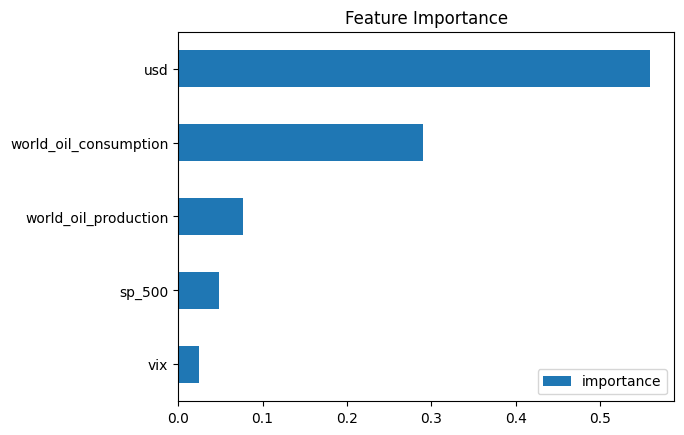

In [10]:
fig = pd.DataFrame(data=xgb_reg.feature_importances_,
             index=xgb_reg.feature_names_in_,
             columns=['importance'])
fig.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

# Conclusions 